<a href="https://colab.research.google.com/github/rajdua/sep_769_deep_learning/blob/main/cps_project___Group5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Connecting to google drive to access dataset***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Importing Libraries and Modules***

In [2]:
import sys
import os
import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools

import numpy as np
import seaborn as sns
import pandas as pd
from tabulate import tabulate
import pathlib

import random

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix


***Extracting sub-folders names***

In [3]:
# Directory where data is stored
data_directory = pathlib.Path('/content/drive/MyDrive/Colab Notebooks/train')

In [4]:
# Each sub-directory within main directory reperesent class/catagory name
data_subdirectories = [dir.name for dir in data_directory.iterdir() if dir.is_dir()]
data_subdirectories

['Open', 'no_yawn', 'Closed', 'yawn']


**Exploring Data - Number of images for each catagory**

Class      Number of Images
-------  ------------------
Open                    726
no_yawn                 725
Closed                  726
yawn                    723


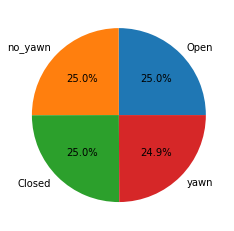

In [5]:
images_count = []
for dir in data_subdirectories:
  count = len(list(data_directory.glob(f'{dir}/*.jpg')))
  images_count.append([dir, count])

# define header names
col_names = ["Class", "Number of Images"]

# displaying table
print(tabulate(images_count, headers=col_names))

# Display pie chart
labels = []
counts = []
for label, count in images_count:
  labels.append(label)
  counts.append(count)

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()

***Visualizing Data/Images - Viewing random images for each catagory***

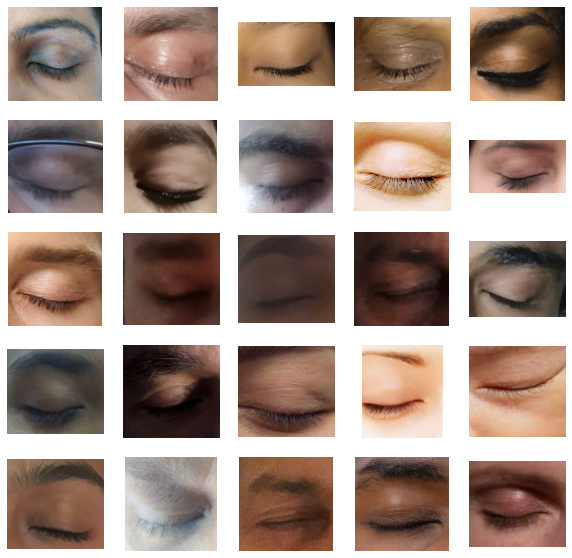

In [6]:
# Random images for eyes closed catagory

files_url = []

for path in pathlib.Path(f"{data_directory}/Closed/.").iterdir():
  if path.is_file():
    files_url.append(path)

random.shuffle(files_url)

fig = plt.figure(figsize=(10, 10))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.grid(False)
  plt.axis("off")
  plt.imshow(plt.imread(files_url[i]))

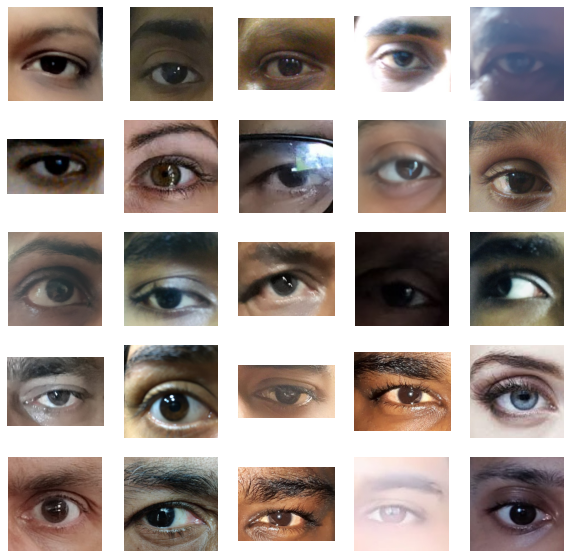

In [7]:
# Random images for eyes open catagory

files_url = []

for path in pathlib.Path(f"{data_directory}/Open/.").iterdir():
  if path.is_file():
    files_url.append(path)

random.shuffle(files_url)

fig = plt.figure(figsize=(10, 10))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.grid(False)
  plt.axis("off")
  plt.imshow(plt.imread(files_url[i]))

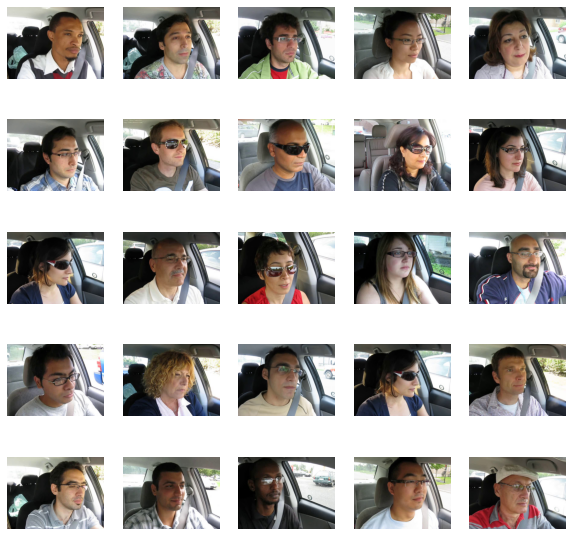

In [8]:
# Random images for no_yawn catagory

files_url = []

for path in pathlib.Path(f"{data_directory}/no_yawn/.").iterdir():
  if path.is_file():
    files_url.append(path)


random.shuffle(files_url)

fig = plt.figure(figsize=(10, 10))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.grid(False)
  plt.axis("off")
  plt.imshow(plt.imread(files_url[i]))

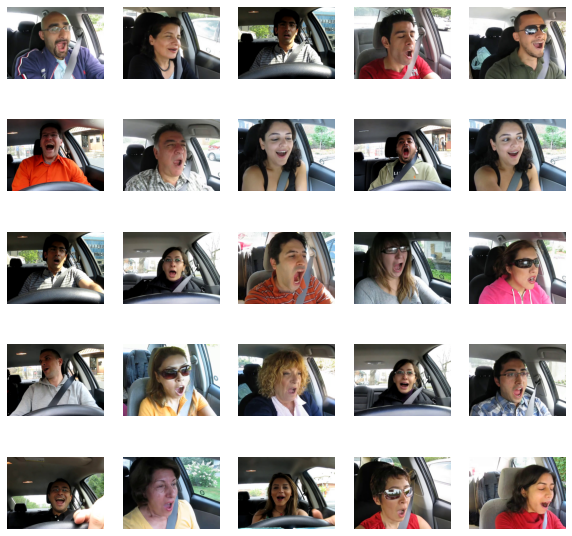

In [9]:
# Random images for yawn catagory

files_url = []

for path in pathlib.Path(f"{data_directory}/yawn/.").iterdir():
  if path.is_file():
    files_url.append(path)

random.shuffle(files_url)

fig = plt.figure(figsize=(10, 10))

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.grid(False)
  plt.axis("off")
  plt.imshow(plt.imread(files_url[i]))

***Splitting the data - 90% Training and 10% Validation***


In [12]:
batch_size = 32
image_size = (224, 224)

print("Training Data Set")
training_dataset = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    validation_split=0.1,
    subset="training",
    seed = 215,
    image_size=image_size,
    batch_size=batch_size
)


print("\nValidation Data Set")
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    validation_split=0.1,
    subset="validation",
    seed=215,
    image_size=image_size,
    batch_size=batch_size
)

Training Data Set
Found 2900 files belonging to 4 classes.
Using 2610 files for training.

Validation Data Set
Found 2900 files belonging to 4 classes.
Using 290 files for validation.


**Data Class Names**

In [13]:
class_names = training_dataset.class_names
class_names

['Closed', 'Open', 'no_yawn', 'yawn']

***Visualizing Training Data***


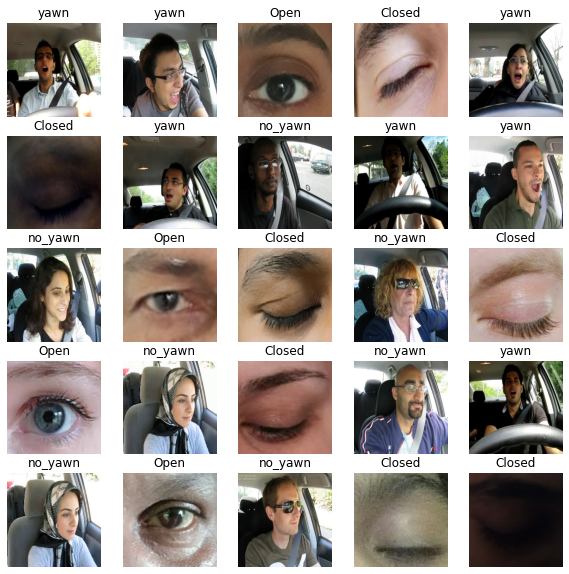

In [14]:
fig = plt.figure(figsize=(10, 10))

for images, labels in training_dataset.take(1):
  for index in range(25):
    plt.subplot(5, 5, index+1)
    plt.imshow(images[index].numpy().astype("uint8"))
    plt.title(class_names[labels[index]])
    plt.axis("off")


***Creating the model***


In [15]:
num_classes = len(class_names)

model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(image_size[0], image_size[1], 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, 5, padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, 5, padding='valid', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes, activation='softmax'),

])

**Model Summary and Plot**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 220, 220, 128)     9728      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 128)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 128)     0         
                                                                 
 batch_normalization_1 (Batc  (None, 110, 110, 128)    5

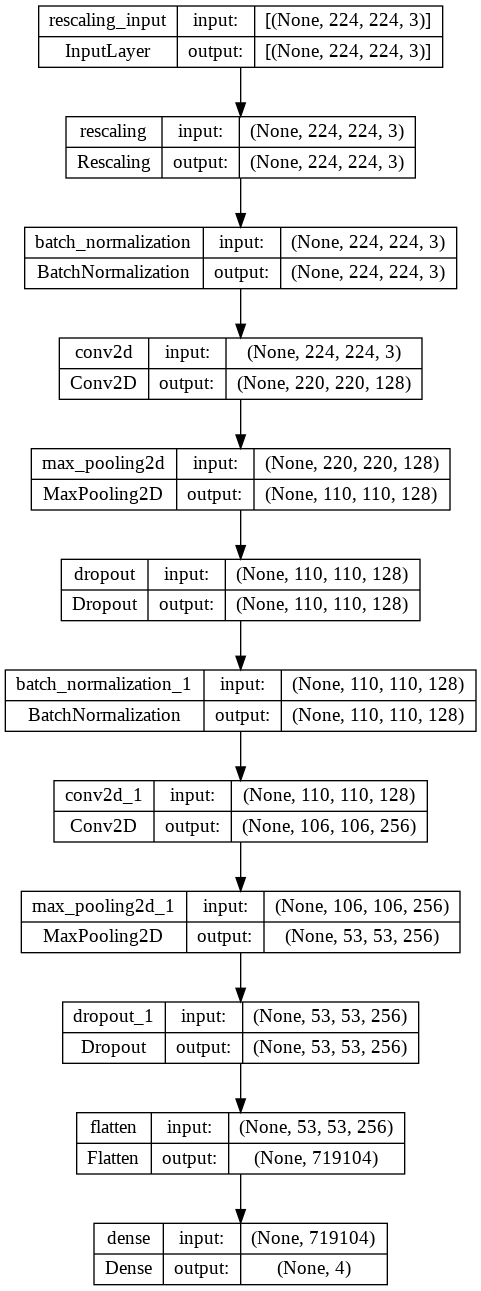

In [16]:
print(model.summary())

tf.keras.utils.plot_model(model, show_shapes=True)

**Compile and train the model**

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:

epochs = 25

history = model.fit(training_dataset, 
                    batch_size=32,
                    validation_data=validation_dataset, 
                    epochs=epochs)

Epoch 1/25
82/82 [==============================] - 31s 298ms/step - loss: 57.1950 - accuracy: 0.6510 - val_loss: 2.7441 - val_accuracy: 0.6759
Epoch 2/25
82/82 [==============================] - 22s 264ms/step - loss: 30.0722 - accuracy: 0.7697 - val_loss: 7.1479 - val_accuracy: 0.6931
Epoch 3/25
82/82 [==============================] - 21s 257ms/step - loss: 30.5530 - accuracy: 0.8107 - val_loss: 12.5254 - val_accuracy: 0.7448
Epoch 4/25
82/82 [==============================] - 21s 255ms/step - loss: 15.2405 - accuracy: 0.8521 - val_loss: 7.6925 - val_accuracy: 0.8207
Epoch 5/25
82/82 [==============================] - 21s 256ms/step - loss: 4.2422 - accuracy: 0.9234 - val_loss: 3.2764 - val_accuracy: 0.8655
Epoch 6/25
82/82 [==============================] - 21s 256ms/step - loss: 1.2093 - accuracy: 0.9579 - val_loss: 2.6795 - val_accuracy: 0.9000
Epoch 7/25
82/82 [==============================] - 21s 256ms/step - loss: 0.8965 - accuracy: 0.9648 - val_loss: 3.9854 - val_accuracy: 0

**Plot Accuracy and Loss**

Text(0.5, 1.0, 'Accuracy Curves')

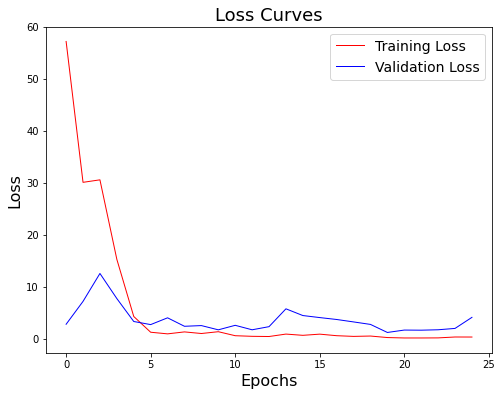

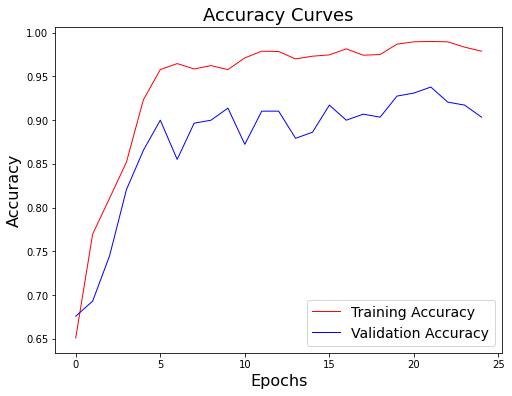

In [19]:
training_acc = model.history.history['accuracy']
validation_acc = model.history.history['val_accuracy']

training_loss = model.history.history['loss']
validation_loss = model.history.history['val_loss']

plt.figure(figsize=[8, 6])
plt.plot(training_loss, 'r', linewidth=1.0)
plt.plot(validation_loss, 'b', linewidth=1.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=18)

plt.figure(figsize=[8, 6])
plt.plot(training_acc, 'r', linewidth=1.0)
plt.plot(validation_acc, 'b', linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=18)

**Confusion Matrix and Classification Report**

1/1 [==============================] - 0s 73ms/step


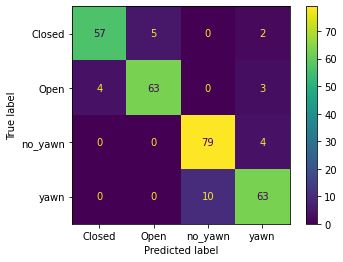

In [20]:
y_pred_arr = []
y_true_arr = []

for image_batch, label_batch in validation_dataset:
  y_true_arr.append(label_batch)
  y_pred_arr.append(np.argmax(model.predict(image_batch), axis=-1))

y_true = tf.concat([value for value in y_true_arr], axis = 0)
y_pred = tf.concat([value for value in y_pred_arr], axis = 0)

cm = confusion_matrix(y_true, y_pred)
cm_plot = ConfusionMatrixDisplay(cm, display_labels=class_names)
cm_plot.plot()


In [21]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        64
           1       0.93      0.90      0.91        70
           2       0.89      0.95      0.92        83
           3       0.88      0.86      0.87        73

    accuracy                           0.90       290
   macro avg       0.91      0.90      0.90       290
weighted avg       0.90      0.90      0.90       290



**Save model for later use**

In [22]:
saved_model_location = f"/content/drive/MyDrive/Colab Notebooks"

model.save(saved_model_location)

**Transfer Learning - Using ResNet152**

In [23]:
# Download and configure ResNet152 model 
resnet_152 = tf.keras.applications.ResNet152(weights='imagenet',
                                               include_top=True, 
                                               input_shape=(image_size[0], 
                                                            image_size[1], 3),
                                                pooling='max', 
                                                )

In [24]:
# Make ResNet152 layers trainable
for layer in resnet_152.layers:
    layer.trainable = True

**Compile and train the ResNet152 model**

In [25]:
resnet_152.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
epochs = 15

history = resnet_152.fit(training_dataset, 
                    batch_size=32,
                    validation_data=validation_dataset, 
                    epochs=epochs)

Epoch 1/15
82/82 [==============================] - 90s 879ms/step - loss: 0.5000 - accuracy: 0.8862 - val_loss: 2552.5857 - val_accuracy: 0.2517
Epoch 2/15
82/82 [==============================] - 68s 823ms/step - loss: 0.1108 - accuracy: 0.9674 - val_loss: 18.0739 - val_accuracy: 0.6069
Epoch 3/15
82/82 [==============================] - 67s 818ms/step - loss: 0.0627 - accuracy: 0.9797 - val_loss: 0.1853 - val_accuracy: 0.9241
Epoch 4/15
82/82 [==============================] - 67s 817ms/step - loss: 0.0837 - accuracy: 0.9762 - val_loss: 67.5338 - val_accuracy: 0.3241
Epoch 5/15
82/82 [==============================] - 67s 815ms/step - loss: 0.0277 - accuracy: 0.9927 - val_loss: 0.0987 - val_accuracy: 0.9793
Epoch 6/15
82/82 [==============================] - 67s 818ms/step - loss: 0.0275 - accuracy: 0.9897 - val_loss: 0.0814 - val_accuracy: 0.9828
Epoch 7/15
82/82 [==============================] - 67s 817ms/step - loss: 0.0208 - accuracy: 0.9954 - val_loss: 0.0381 - val_accuracy: 0

**Plot Accuracy and Loss**

Text(0.5, 1.0, 'Accuracy Curves')

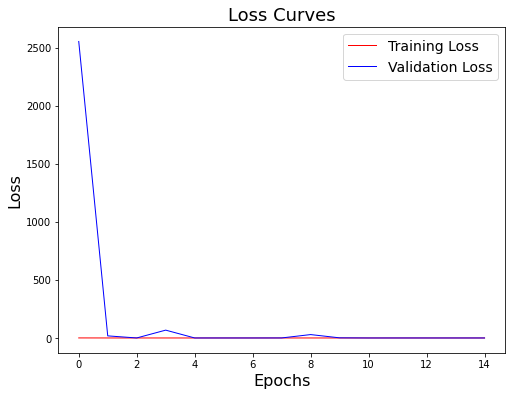

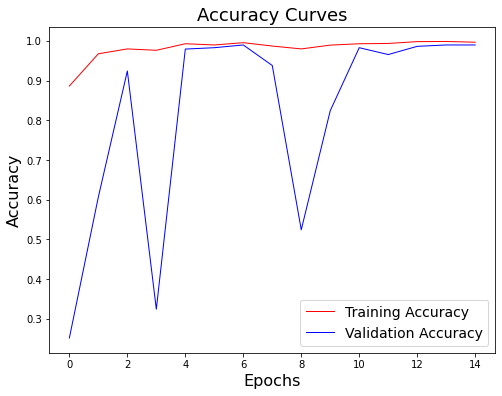

In [27]:
training_acc = resnet_152.history.history['accuracy']
validation_acc = resnet_152.history.history['val_accuracy']

training_loss = resnet_152.history.history['loss']
validation_loss = resnet_152.history.history['val_loss']

plt.figure(figsize=[8, 6])
plt.plot(training_loss, 'r', linewidth=1.0)
plt.plot(validation_loss, 'b', linewidth=1.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=18)

plt.figure(figsize=[8, 6])
plt.plot(training_acc, 'r', linewidth=1.0)
plt.plot(validation_acc, 'b', linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=18)

**Save Model for later use**


In [28]:
saved_res_model_location = f"/content/drive/MyDrive/Colab Notebooks"

resnet_152.save(saved_res_model_location)

**Confusion Matrix and Classification Report**

1/1 [==============================] - 3s 3s/step


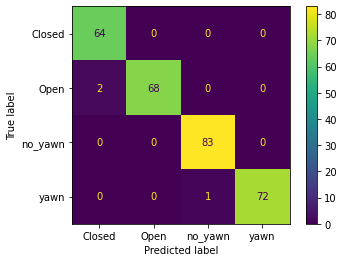

In [29]:
y_pred_arr = []
y_true_arr = []

for image_batch, label_batch in validation_dataset:
  y_true_arr.append(label_batch)
  y_pred_arr.append(np.argmax(resnet_152.predict(image_batch), axis=-1))

y_true = tf.concat([value for value in y_true_arr], axis = 0)
y_pred = tf.concat([value for value in y_pred_arr], axis = 0)

cm = confusion_matrix(y_true, y_pred)
cm_plot = ConfusionMatrixDisplay(cm, display_labels=class_names)
cm_plot.plot()


In [30]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        64
           1       1.00      0.97      0.99        70
           2       0.99      1.00      0.99        83
           3       1.00      0.99      0.99        73

    accuracy                           0.99       290
   macro avg       0.99      0.99      0.99       290
weighted avg       0.99      0.99      0.99       290

